In [1]:
import os
import pandas as pd
from feature_functions import apply_zscore_signal
from utils.backtester import Backtester

# Directory containing asset data
asset_dir = './hist_data/crypto/kraken_4hr/'

# Initialize EV dictionary
asset_ev_dict = {}
df_dict = {}
reg_window = 5
reg_thresh = .75
# Iterate over all assets
for asset_file in os.listdir(asset_dir):
    if asset_file.endswith('.txt'):
        asset_path = os.path.join(asset_dir, asset_file)
        df = pd.read_csv(asset_path, sep=',')
        df['Date'] = pd.to_datetime(df['date'], unit='s')
        df_dict[asset_file] = df

ADAUSDT.txt


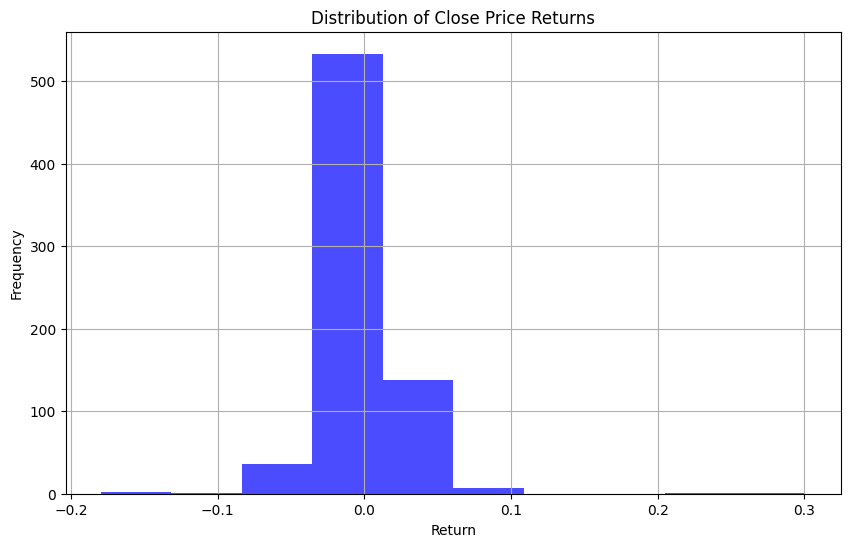

In [2]:
import matplotlib.pyplot as plt

syms = list(df_dict.keys())
test_idx = 0
df = df_dict[syms[test_idx]]

print(syms[test_idx])
returns = df['close'].pct_change().dropna()

plt.figure(figsize=(10, 6))
plt.hist(returns, bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Close Price Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Green candles: 7      3.0
8      3.0
9      3.0
10     4.0
11     5.0
      ... 
715    4.0
716    3.0
717    3.0
718    4.0
719    4.0
Length: 713, dtype: float64
Red candles: 7      5.0
8      5.0
9      5.0
10     4.0
11     3.0
      ... 
715    4.0
716    5.0
717    5.0
718    4.0
719    4.0
Length: 713, dtype: float64


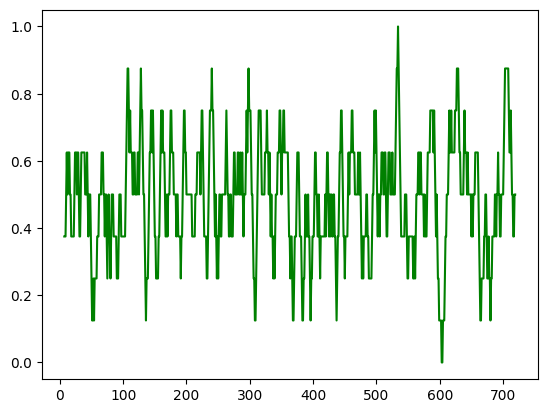

In [26]:
green_candles = (df['close'] > df['open']).rolling(8).sum().dropna()
red_candles = (df['close'] < df['open']).rolling(8).sum().dropna()

print(f"Green candles: {green_candles}")
print(f"Red candles: {red_candles}")
rolling_ratio = green_candles / (green_candles + red_candles)

plt.plot(rolling_ratio, label='Rolling Ratio of Green Candles', color='green')
plt.show()

{'Initial Balance': 10000, 'Final Balance': 11508.791606654582, 'Total Return (%)': 15.087916066545823, 'Max Drawdown (%)': -35.75088497550675, 'Sharpe Ratio': 0.3020806894210798}


c:\Users\nick5\dev\hypercube_ai\ai\treetrader\utils\backtester.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9944.133442437595' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Portfolio'] = balance + (position * df.loc[i, 'close'])


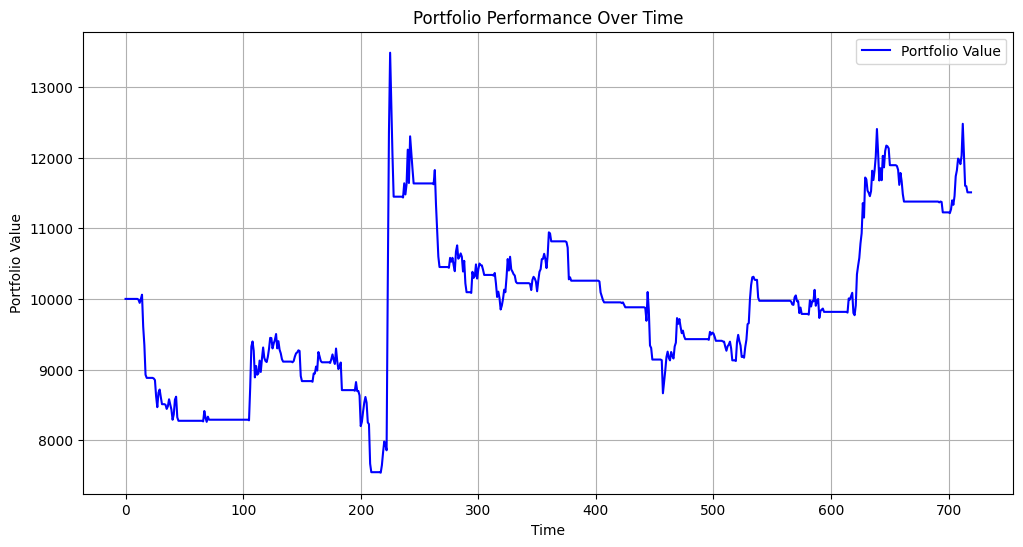

In [29]:
from utils.backtester import Backtester
import numpy as np

np.random.seed(34)  # For reproducibility
df["rolling_ratio"] = rolling_ratio
#df["rolling_ratio"] = np.random.rand(len(df))
# Initialize Backtester
backtester = Backtester(initial_balance=10000, transaction_cost=0.001)
# Simple momentum strategy
df['Signal'] = 0
df.loc[df['rolling_ratio'] > 0.5, 'Signal'] = 1   # Strong uptrend
df.loc[df['rolling_ratio'] < 0.5, 'Signal'] = -1  # Strong downtrend

result = backtester.simple_backtest(df, signal_column='Signal')
print(backtester.calculate_performance(result))
# Plot the performance of the backtest
backtester.plot_performance(result)